#### Here are the steps we will take:

    1. Load and prepare the dataset
    2. Visualize the time series data
    3. Check for stationarity
    4. Decompose the time series
    5. Perform a seasonal decomposition of the time series
    6. Fit an ARIMA model
    7. Evaluate the performance of the model
    8. Forecast future values

#### load libraries

In [59]:
# We will use Python and the pandas, matplotlib, and statsmodels libraries to perform our analysis.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 

import pytz
warnings.filterwarnings('ignore')

#### load dataset

In [61]:
dataset = pd.read_csv("Dataset/AirPassengers.csv")
#  The Air Passengers dataset contains monthly data on the number of airline passengers from 1949 to 1960.

In [62]:
# convert the 'Month' column to datetime
dataset['Month'] = pd.to_datetime(dataset['Month'])

# set the index to the 'Month' column
dataset.set_index('Month', inplace=True)

# localize the index to UTC timezone
dataset.index = dataset.index.tz_localize(pytz.utc)

In [143]:
# check header
dataset.tail(24)

,Passengers
Month,
1959-01-01 00:00:00+00:00,360
1959-02-01 00:00:00+00:00,342
1959-03-01 00:00:00+00:00,406
1959-04-01 00:00:00+00:00,396
1959-05-01 00:00:00+00:00,420
1959-06-01 00:00:00+00:00,472
1959-07-01 00:00:00+00:00,548
1959-08-01 00:00:00+00:00,559
1959-09-01 00:00:00+00:00,463


#### check missing values

In [64]:
dataset.isnull().sum()

#Passengers    0
dtype: int64

#### check the shape of the dataset

In [65]:
# check the shape
dataset.shape

(144, 1)

#### Visualize the time series data

In [67]:
# Rename the column name #Passengers
dataset = dataset.rename(columns = {'#Passengers': 'Passengers'})

In [83]:
# split the data into train and test sets
train_data = dataset.iloc[:120]
test_data = dataset.iloc[120:]

In [84]:
train_data.head()

,Passengers
Month,
1949-01-01 00:00:00+00:00,112
1949-02-01 00:00:00+00:00,118
1949-03-01 00:00:00+00:00,132
1949-04-01 00:00:00+00:00,129
1949-05-01 00:00:00+00:00,121


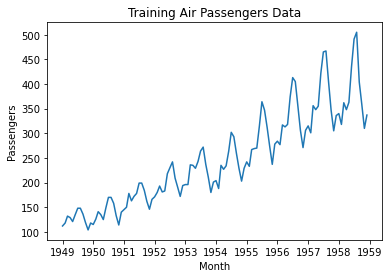

In [86]:
# create a line plot of the data
plt.plot(train_data)

# add labels and title
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Training Air Passengers Data')
plt.show()

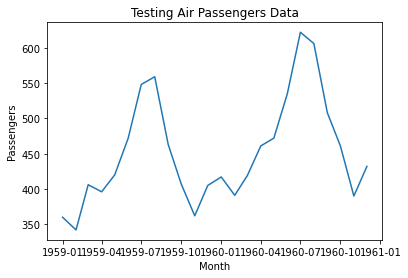

In [87]:
# create a line plot of the data
plt.plot(test_data)

# add labels and title
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Testing Air Passengers Data')
plt.show()

In [88]:
# ADF test --- Feed all the dataset---to check the stationary
result = adfuller(dataset['Passengers'])
print('ADF test statistic:', result[0])
print('p-value:', result[1])
print('Critical values:', result[4])
if result[1] > 0.05:
    print('The series is non-stationary')
else:
    print('The series is stationary')

ADF test statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is non-stationary


Augmented Dickey-Fuller (ADF) test: This is a common statistical test used to check for stationarity. The null hypothesis of the ADF test is that the series has a unit root (i.e., it is non-stationary). If the p-value of the test is less than a significance level (e.g., 0.05), we reject the null hypothesis and conclude that the series is stationary.

In [72]:
# KPSS test
result = kpss(dataset['Passengers'])
print('KPSS test statistic:', result[0])
print('p-value:', result[1])
print('Critical values:', result[3])
if result[1] > 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

KPSS test statistic: 1.6513122354165206
p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is non-stationary


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test: This is another statistical test used to check for stationarity. The null hypothesis of the KPSS test is that the series is stationary. If the p-value of the test is less than a significance level, we reject the null hypothesis and conclude that the series is non-stationary.

#### Decomposing a time series
Decomposing a time series can help to identify its components, such as trend, seasonality, and noise. This can provide insights into the underlying patterns in the data and help to better understand the behavior of the series. Here's an example code snippet that uses the seasonal_decompose() function from the statsmodels library to decompose the 

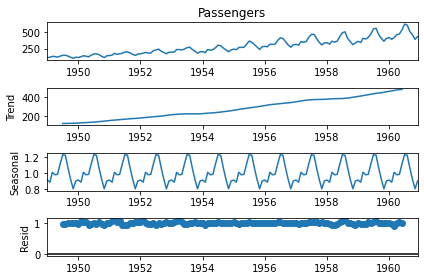

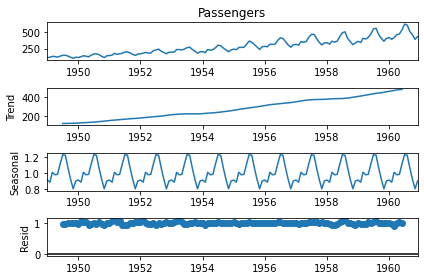

In [73]:
# decompose the time series
result = seasonal_decompose(dataset['Passengers'], model='multiplicative', period=12)
# plot the decomposed components
result.plot()

In [74]:
# perform ADF test on the time series
result = adfuller(dataset['Passengers'])

# print the test results
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

ADF Statistic: 0.815
p-value: 0.992
Critical Values:
   1%: -3.482
   5%: -2.884
   10%: -2.579


The output of the code will be the ADF statistic, p-value, and critical values for the test. We can interpret the results as follows:

    If the ADF statistic is less than the critical values at the chosen significance level, then we can reject the null hypothesis and conclude that the time series is stationary, meaning that there is no trend.

    If the ADF statistic is greater than the critical values, then we cannot reject the null hypothesis and conclude that the time series is non-stationary, meaning that there is a trend.

Seasonality analysis: Examine the seasonal component to determine whether there is a repeating pattern in the data. If there is seasonality, it may need to be removed or adjusted to make the series stationary.

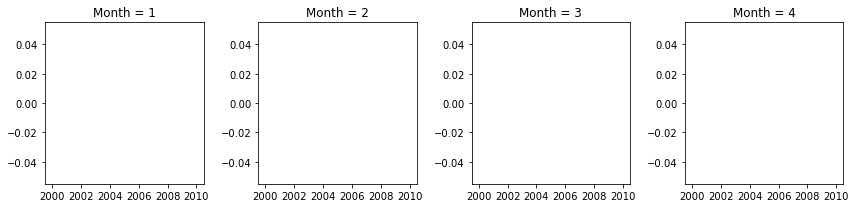

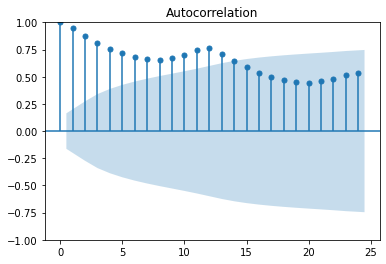

In [75]:
# create seasonal subseries plot
import statsmodels.api as sm
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, ax in enumerate(axes.flatten()):
    ax.plot(dataset[dataset.index == i+1]['Passengers'])
    ax.set_title(f"Month = {i+1}")
plt.tight_layout()

# create ACF plot
sm.graphics.tsa.plot_acf(dataset['Passengers'], lags=24)
plt.show()

# GRIDSEARCH

In [112]:
# define the range of p, d, and q values to test
import numpy as np
import itertools
p = range(0, 5)
d = range(0, 2)
q = range(0, 5)

# generate all possible combinations of p, d, and q values
pdq = list(itertools.product(p, d, q))

# define an empty dictionary to store the MAE values
mae_dict = {}

# iterate over all possible combinations of p, d, and q values
for param in pdq:
    try:
        # fit an ARIMA model on the data using the current set of p, d, and q values
        model = sm.tsa.ARIMA(dataset, order=param)
        results = model.fit()

        # make predictions for the last 24 months of the dataset
        predictions = results.predict(start=dataset.index[-24], end=dataset.index[-1], dynamic=False)

        # calculate the mean absolute error (MAE) between the predicted and actual values
        mae = np.mean(np.abs(predictions - dataset.iloc[-24:, 0]))

        # store the MAE value in the dictionary
        mae_dict[param] = mae

    except:
        continue

# find the set of p, d, and q values that result in the lowest MAE value
best_params = min(mae_dict, key=mae_dict.get)

# print the best set of p, d, and q values
print(f'Best parameters: {best_params}')

Best parameters: (4, 1, 4)


# ARIMA

In [113]:
# fit an ARIMA model on the training data
model = sm.tsa.ARIMA(train_data, order=(4, 1, 4))
results = model.fit()

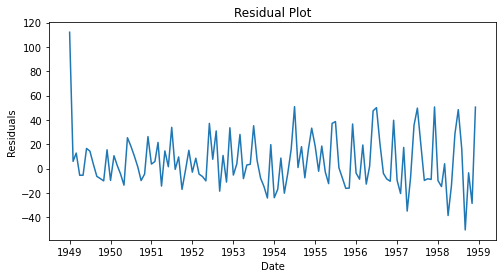

In [114]:
# plot the residuals
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(results.resid)
ax.set_xlabel('Date')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()


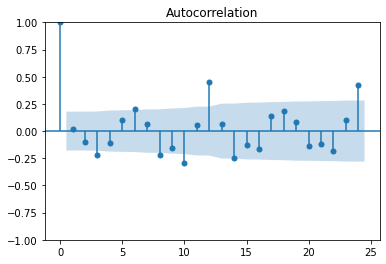

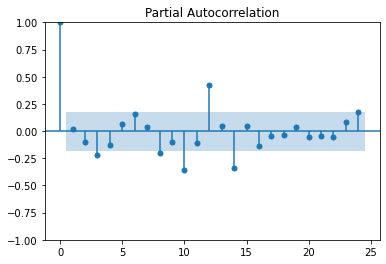

In [115]:

# plot ACF and PACF of residuals
sm.graphics.tsa.plot_acf(results.resid, lags=24)
sm.graphics.tsa.plot_pacf(results.resid, lags=24)
plt.show()

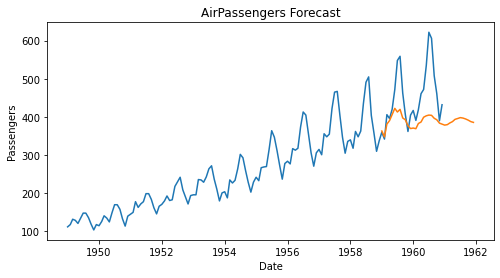

In [116]:
# make predictions
forecast = results.forecast(steps=36)

# plot the original data and the forecast
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dataset['Passengers'])
ax.plot(forecast)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
ax.set_title('AirPassengers Forecast')
plt.show()

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

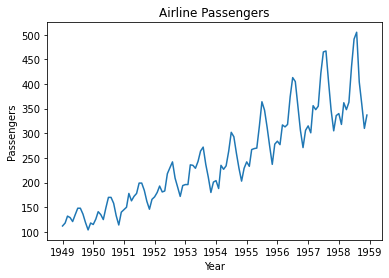

In [121]:
# Visualize the time series
plt.plot(train_data)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()

In [122]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(dataset, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

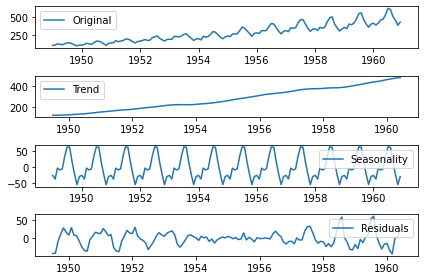

In [124]:
# Visualize the decomposed time series
plt.subplot(411)
plt.plot(dataset, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

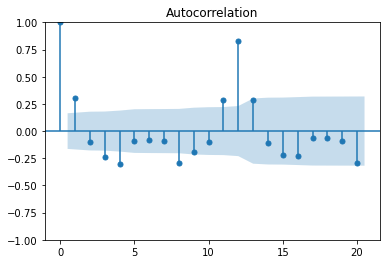

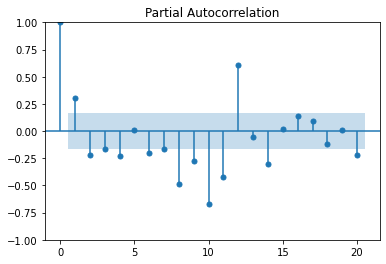

In [126]:
# Determine the order of differencing required to make the time series stationary
diff = dataset.diff().dropna()
plot_acf(diff, lags=20)
plot_pacf(diff, lags=20)
plt.show()

# SARIMAX

In [129]:
# Fit a Seasonal ARIMA (SARIMA) model to the differenced time series
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -398.830
Date:                            Mon, 17 Apr 2023   AIC                            807.660
Time:                                    16:35:13   BIC                            821.024
Sample:                                01-01-1949   HQIC                           813.078
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4901      0.351     -1.397      0.162      -1.178       0.197
ma.L1          0.2579      0.373   

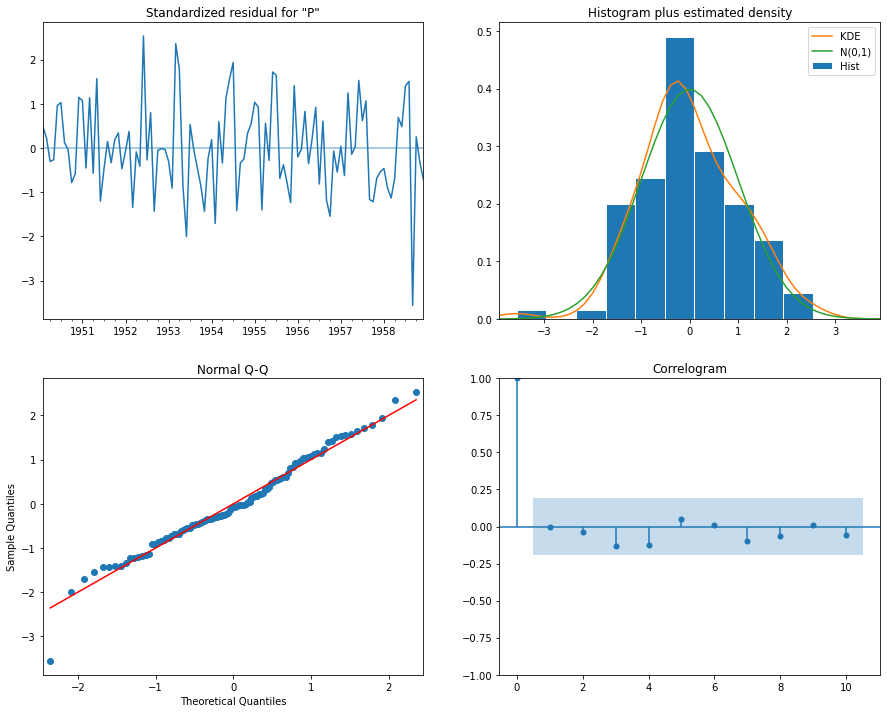

In [130]:
# Evaluate the model fit
print(results.summary())
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [144]:
# Make predictions for the next 24 months
pred = results.get_prediction(start='1959-01-01 00:00:00+00:00', dynamic=False)
pred_ci = pred.conf_int()

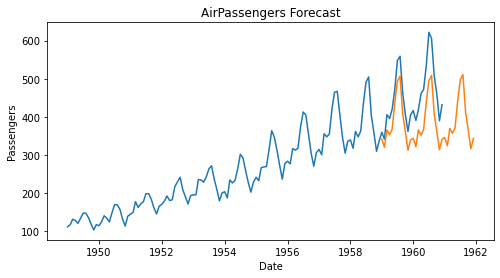

In [147]:
# make predictions
forecast = results.forecast(steps=36)

# plot the original data and the forecast
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dataset['Passengers'])
ax.plot(forecast)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
ax.set_title('AirPassengers Forecast')
plt.show()

,lower Passengers,upper Passengers
1959-01-01 00:00:00+00:00,322.626512,361.931796
